In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

import matplotlib.pyplot as plt

## Data

In [2]:
true_b = 1
true_w = 2
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (0.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

In [3]:
idx = np.arange(N)
np.random.shuffle(idx)

train_idx = idx[:int(N * 0.8)]
test_idx = idx[int(N * 0.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

Text(0.5, 1.0, 'Test')

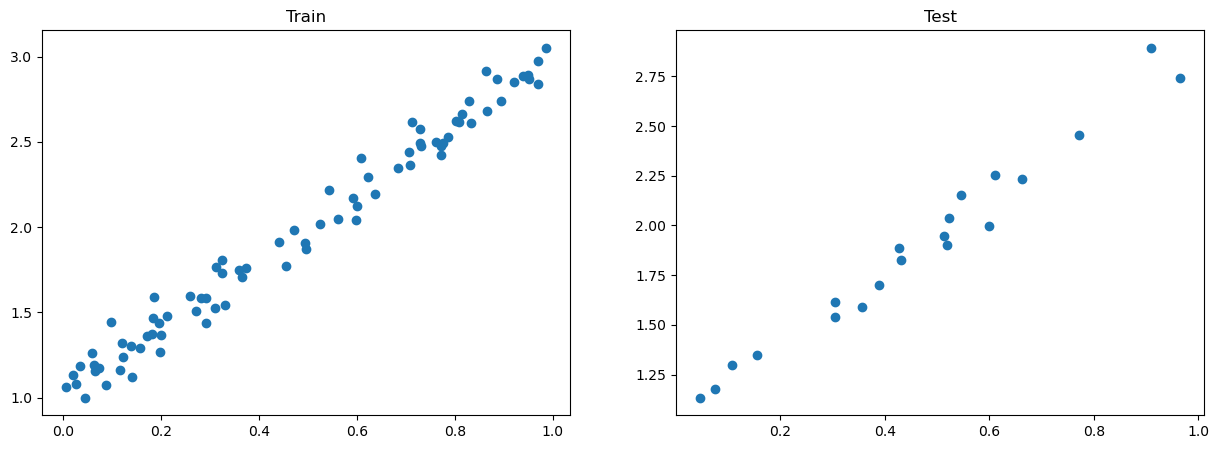

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.scatter(x_train, y_train)
ax1.set_title('Train')
ax2.scatter(x_test, y_test)
ax2.set_title('Test')

In [5]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


In [6]:
# Step 1 - Computes our model's predicted output - forward pass
y_hat = b + w * x_train

In [7]:
# Step 2 - Computing the loss

# We are using ALL data points, so this is BATCH gradient descent
error = (y_hat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


In [8]:
# Step 3 -  Compute the Gradients
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


In [9]:
# Step 4 - Update Parameters
lr = 0.1
print(b, w)

b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


In [11]:
# Step 5 - Rinse and Repeat
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
 
print(b, w)

lr = 0.1
n_epochs = 1000

for epoch in range(n_epochs):
    y_hat = b + w * x_train

    error = (y_hat - y_train)
    loss = (error ** 2).mean()

    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()

    b = b - lr * b_grad
    w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


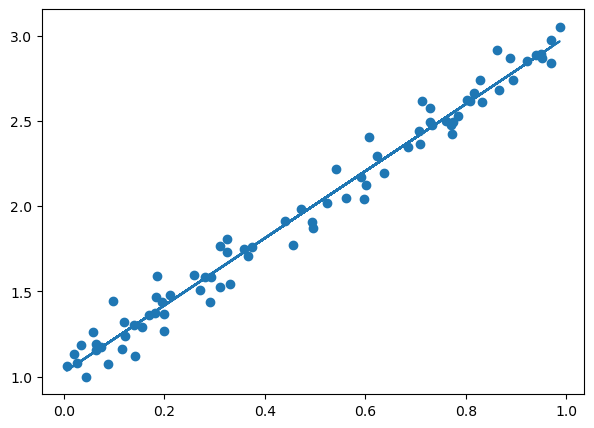

In [14]:
fig, ax = plt.subplots(figsize = (7, 5))
ax.plot(x_train, y_hat)
ax.scatter(x_train, y_train)

In [15]:
# Sanity Check
lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.intercept_, lm.coef_[0])

[1.02354075] [1.96896447]


## Torch Version

In [16]:
import torch_directml
gpu = torch_directml.device()

In [18]:
# convert dataset to gpu tensor
x_train_tensor = torch.as_tensor(x_train).float().to(gpu)
y_train_tensor = torch.as_tensor(y_train).float().to(gpu)

In [19]:
# Step 0 - Initialize Random Start
torch.manual_seed(42)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = gpu)
w = torch.randn(1, requires_grad = True, dtype = torch.float, device = gpu)
print(b, w)

tensor([0.3367], device='privateuseone:0', requires_grad=True) tensor([0.1288], device='privateuseone:0', requires_grad=True)


In [20]:
# Step 1 - Predict
y_hat = b + w * x_train_tensor

In [21]:
# Step 2 - Compute Loss
error = y_hat - y_train_tensor
loss = (error ** 2).mean() # MSE

In [22]:
# Step 3 - Compute Gradient USING BACKWARD()
loss.backward()

In [24]:
print(error.requires_grad, y_hat.requires_grad, b.requires_grad, w.requires_grad)
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

True True True True
False False


In [25]:
print(b.grad, w.grad)

tensor([-3.1125], device='privateuseone:0') tensor([-1.8156], device='privateuseone:0')


In [ ]:
# Step 4 - Update Parameters AND ZERO GRADIENTS

b.grad.zero(), w.grad.zero()

In [ ]:
# Step 5 - Loop